# Sentiment Analysis IMDB Reviews

## Problem Statement
Build a model to classify the sentiment of a movie review as positive or negative and compare the performance of different Bayes theorem based models.

## Algorithm used
GaussianNB, MultinomialNB, BernoulliNB from Sklearn

## Dataset Information
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

## Steps involved
- Data Load and Analysis
- Data Wragling
- Exploratory Data Analysis
- Splitting the dataset
- Count Vectorizer transformation
- Modelling
- Model Evaluation and Comparison

In [1]:
# Base Libraries
import numpy as np  
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing Libraries
import re
from sklearn.feature_extraction.text import CountVectorizer

# Model Related Libraries
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay

In [2]:
# Load the dataset
movie_reviews = pd.read_csv('IMDB Dataset.csv')

In [3]:
%pprint true

Pretty printing has been turned OFF


In [4]:
# Check the first 5 rows of the dataset
movie_reviews.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [5]:
# Check the shape of the dataset
movie_reviews.shape

(50000, 2)

In [6]:
# Check the value counts of the sentiment column
movie_reviews.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
# Check the info about the dataset
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


No missing data present in the data thus we are good to go with the next step.

In [8]:
# check duplicate rows
movie_reviews=movie_reviews[~movie_reviews.duplicated()]

In [9]:
# Changing Mapping of Sentiment Column
movie_reviews.sentiment = movie_reviews.sentiment.map({'positive':1, 'negative':0})
movie_reviews.sentiment=movie_reviews.sentiment.astype('int16')
# Checking the dataframe
movie_reviews.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, f

In [10]:
# Converting text to lowercase to avoid duplication
movie_reviews.review = movie_reviews.review.str.lower()
# Checking the dataframe
movie_reviews.head()

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only ""has got all the polari"" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.",1
2,"i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than ""devil wears prada"" and more interesting than ""superman"" a great comedy to go see with friends.",1
3,"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, f

In [11]:
# Cleaning html tags and special characters
movie_reviews.review = movie_reviews.review.str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "")
movie_reviews.head()

C:\Users\sukhi\AppData\Local\Temp/ipykernel_19896/4164900630.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_reviews.review = movie_reviews.review.str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "")


,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,1
1,a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,1
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovebr br this was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanbr br this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,1
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the timebr br this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombiebr br ok first of all when youre going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in real life and then we have jake with his 

In [12]:
# convert to X and y
X = movie_reviews.review
y = movie_reviews.sentiment
print(X.shape)
print(y.shape)

(49582,)
(49582,)


In [13]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,shuffle=True, test_size=0.3, stratify=y)

In [14]:
# vectorizing the sentences; removing stop words
vect = CountVectorizer(stop_words='english')

In [15]:
# fit CountVectorizer to training data
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [16]:
# transforming the train and test datasets
X_train = vect.transform(X_train)
X_test = vect.transform(X_test) 

In [17]:
# Function to evaluate the model
def model_evaluation(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the model
    y_pred = model.predict(X_test)
    # Model Evaluation
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('F1 Score: ', f1_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification Report: ', classification_report(y_test, y_pred))
    # Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [18]:
# Initializing the model object
mnb=MultinomialNB()
bnb=BernoulliNB()

Accuracy Score:  0.8563361344537815
Precision Score:  0.8697945585785675
Recall Score:  0.8393837910247823
F1 Score:  0.8543186311268661
Confusion Matrix:  [[6472  938]
 [1199 6266]]
Classification Report:                precision    recall  f1-score   support

           0       0.84      0.87      0.86      7410
           1       0.87      0.84      0.85      7465

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



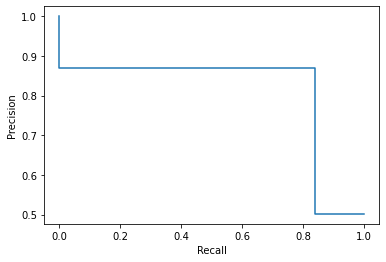

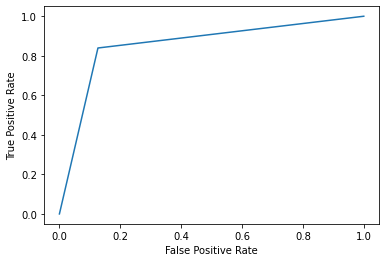

In [19]:
# Model Evaluation for Multinomial Naive Bayes
model_evaluation(mnb, X_train, y_train, X_test, y_test)

Accuracy Score:  0.8474621848739495
Precision Score:  0.8724197247706422
Recall Score:  0.8152712659075686
F1 Score:  0.842877917041756
Confusion Matrix:  [[6520  890]
 [1379 6086]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.88      0.85      7410
           1       0.87      0.82      0.84      7465

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



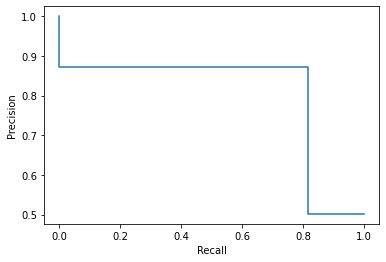

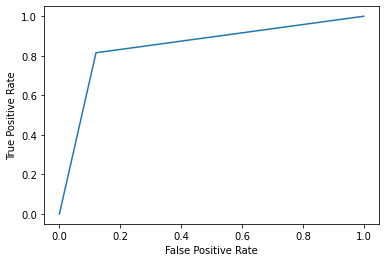

In [20]:
# Model Evaluation for Bernoulli Naive Bayes
model_evaluation(bnb, X_train, y_train, X_test, y_test)

## Web App Interface for the model

In [24]:
# Using Gradio to create a web app for model usage
import gradio as gr

def predict_class(Review):
    pred = mnb.predict(vect.transform([Review.lower().replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "")]))
    if(pred==1):
        return "Positive"
    else:
        return "Negative"
demo = gr.Interface(fn=predict_class, inputs="text", outputs="text")

demo.launch(share=True)   

Running on local URL:  http://127.0.0.1:7863


Connected (version 2.0, client OpenSSH_7.6p1)
Authentication (publickey) successful!


Running on public URL: https://22551.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App object at 0x0000022B03590C70>, 'http://127.0.0.1:7863/', 'https://22551.gradio.app')